In [37]:
from matplotlib import pyplot as plt
from scipy import stats
import pandas as pd
import numpy as np


data_df = pd.read_csv("Data_Science_Salaries_Clean.csv")
data_df = pd.DataFrame(data_df)
data_df

#-------------------------------------------------------------------
#This is the final cleaned DataFrame to use

,Unnamed: 0,Job Title,Employment Type,Experience Level,Expertise Level,Salary,Salary Currency,Company Location,Salary in USD,Employee Residence,Company Size,Year
0,0,Data Engineer,Full-Time,Senior,Expert,210000,United States Dollar,United States,210000,United States,Medium,2023
1,1,Data Engineer,Full-Time,Senior,Expert,165000,United States Dollar,United States,165000,United States,Medium,2023
2,2,Data Engineer,Full-Time,Senior,Expert,185900,United States Dollar,United States,185900,United States,Medium,2023
3,3,Data Engineer,Full-Time,Senior,Expert,129300,United States Dollar,United States,129300,United States,Medium,2023
4,4,Data Scientist,Full-Time,Senior,Expert,140000,United States Dollar,United States,140000,United States,Medium,2023
...,...,...,...,...,...,...,...,...,...,...,...,...
2223,3289,Machine Learning Engineer,Full-Time,Senior,Expert,40000,Euro,Croatia,45618,Croatia,Small,2020
2224,3291,Data Scientist,Full-Time,Mid,Intermediate,160000,Singapore Dollar,Israel,119059,Singapore,Medium,2021
2225,3293,Data Engineer,Full-Time,Mid,Intermediate,24000,Euro,Malta,28369,Malta,Large,2021
2226,3295,Data Scientist,Full-Time,Senior,Expert,412000,United States Dollar,United States,412000,United States,Large,2020


In [4]:
experience_salary_stats_df = data_df.groupby(["Job Title", "Experience Level"])["Salary in USD"].agg(["mean", "median", "max", "min"])
experience_salary_stats_df = experience_salary_stats_df.rename(columns={"mean": "Average Salary", "median": "Median Salary", "max": "Maximum Salary", "min": "Minimum Salary"})
experience_salary_stats_df = experience_salary_stats_df.applymap('${:,.2f}'.format)
experience_salary_df = experience_salary_stats_df.reindex(["Entry", "Mid", "Senior", "Executive"], level="Experience Level")
experience_salary_df


Average Salary Median Salary  \
Job Title                 Experience Level                                
Analytics Engineer        Entry               $101,333.33    $90,000.00   
                          Mid                 $129,486.05   $112,400.00   
                          Senior              $159,379.76   $152,250.00   
                          Executive           $175,125.00   $166,000.00   
Data Analyst              Entry                $64,327.75    $57,920.00   
                          Mid                  $99,194.70    $93,000.00   
                          Senior              $123,588.47   $119,610.00   
                          Executive           $113,750.00   $120,000.00   
Data Engineer             Entry                $75,370.02    $65,000.00   
                          Mid                 $105,866.78    $95,000.00   
                          Senior              $155,895.87   $152,437.50   
                          Executive           $194,317.00   $200,000.00   
Data Scientist            Entry                $75,021.37    $74,141.00   
                          Mid                  $96,619.08    $90,367.00   
                          Senior              $167,714.71   $164,500.00   
                          Executive           $188,429.58   $185,000.00   
Machine Learning Engineer Entry                $98,389.35    $92,500.00   
                          Mid                 $131,848.55   $126,277.00   
                          Senior              $184,850.77   $182,200.00   

                                           Maximum Salary Minimum Salary  
Job Title                 Experience Level                                
Analytics Engineer        Entry               $130,000.00     $84,000.00  
                          Mid                 $430,640.00     $48,000.00  
                          Senior              $289,800.00     $48,000.00  
                          Executive           $221,000.00    $135,000.00  
Data Analyst              Entry               $150,000.00     $15,000.00  
                          Mid                 $430,967.00     $15,680.00  
                          Senior              $385,000.00     $15,809.00  
                          Executive           $160,000.00     $55,000.00  
Data Engineer             Entry               $160,000.00     $17,025.00  
                          Mid                 $260,000.00     $20,000.00  
                          Senior              $331,640.00     $25,000.00  
                          Executive           $333,500.00     $71,908.00  
Data Scientist            Entry               $190,000.00     $16,000.00  
                          Mid                 $230,000.00     $16,904.00  
                          Senior              $412,000.00     $20,171.00  
                          Executive           $300,000.00     $78,000.00  
Machine Learning Engineer Entry               $250,000.00     $20,000.00  
                          Mid                 $300,000.00     $20,984.00  
                          Senior              $392,000.00     $24,342.00

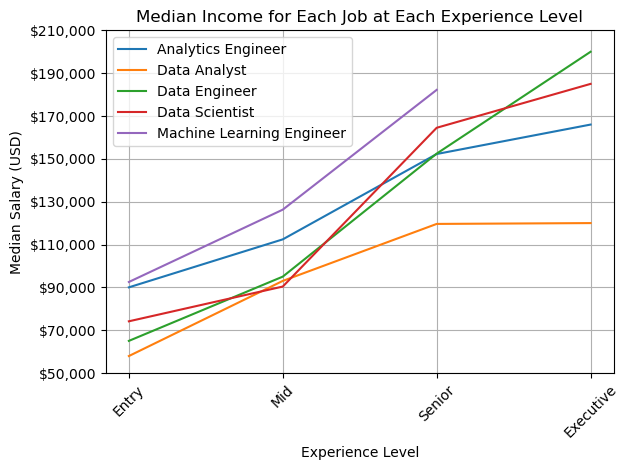

In [54]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming you already have the 'experience_salary_df' DataFrame from the previous code

# Create a line graph for each job title
for job_title in experience_salary_df.index.get_level_values("Job Title").unique():
    job_data = experience_salary_df.loc[job_title, "Median Salary"]
    plt.plot(job_data.index, job_data, label=job_title)

# Add labels and legend
plt.xlabel('Experience Level')
plt.ylabel('Median Salary (USD)')
plt.title('Median Income for Each Job at Each Experience Level')
plt.xticks(rotation=45)
plt.legend()

# Customize the y-axis ticks to start at $50,000 and go up by $20,000
plt.yticks(range(50000, int(experience_salary_df['Median Salary'].max()) + 20000, 20000))

# Define a custom formatter to display dollar values as tick labels
def dollar_format(x, pos):
    return "${:,.0f}".format(x)

# Apply the custom formatter to the y-axis ticks
plt.gca().yaxis.set_major_formatter(FuncFormatter(dollar_format))

plt.grid(True)
# Show the plot
plt.tight_layout()
plt.show()


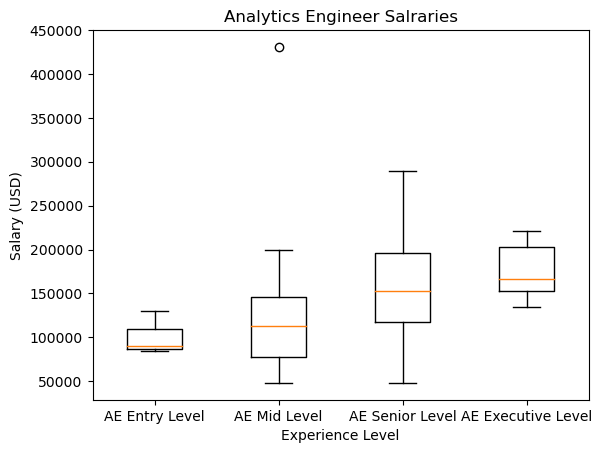

The lower quartile of AE Entry Level salary is: 87000.0
The upper quartile of AE Entry Level salary is: 110000.0
The interquartile range of AE Entry Level salar is: 23000.0
The the median of AE Entry Level salary is: 90000.0 
Values below 52500.0 could be outliers.
Values above 144500.0 could be outliers.
-------------------------------------------------------
The lower quartile of AE Mid Level salary is: 78000.0
The upper quartile of AE Mid Level salary is: 146100.0
The interquartile range of AE Mid Level salar is: 68100.0
The the median of AE Mid Level salary is: 112400.0 
Values below -24150.0 could be outliers.
Values above 248250.0 could be outliers.
-------------------------------------------------------
The lower quartile of AE Senior Level salary is: 117550.0
The upper quartile of AE Senior Level salary is: 196250.0
The interquartile range of AE Senior Level salary is: 78700.0
The the median of AE Senior Level salary is: 152250.0 
Values below -500.0 could be outliers.
Values a

In [46]:
ae_salaries_entry = data_df.loc[(data_df['Job Title'] == "Analytics Engineer") & (data_df['Experience Level'] == 'Entry'), 'Salary in USD']
ae_salaries_executive = data_df.loc[(data_df['Job Title'] == "Analytics Engineer") & (data_df['Experience Level'] == 'Executive'), 'Salary in USD']
ae_salaries_senior = data_df.loc[(data_df['Job Title'] == "Analytics Engineer") & (data_df['Experience Level'] == 'Senior'), 'Salary in USD']
ae_salaries_mid = data_df.loc[(data_df['Job Title'] == "Analytics Engineer") & (data_df['Experience Level'] == 'Mid'), 'Salary in USD']

plt.boxplot([ae_salaries_entry, ae_salaries_mid, ae_salaries_senior, ae_salaries_executive], labels=['AE Entry Level', 'AE Mid Level', 'AE Senior Level', 'AE Executive Level'])

plt.title('Analytics Engineer Salraries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.yticks(range(50000, 500000, 50000))


plt.show()

quartiles = ae_salaries_entry.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of AE Entry Level salary is: {lowerq}")
print(f"The upper quartile of AE Entry Level salary is: {upperq}")
print(f"The interquartile range of AE Entry Level salar is: {iqr}")
print(f"The the median of AE Entry Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print('-------------------------------------------------------')

quartiles = ae_salaries_mid.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of AE Mid Level salary is: {lowerq}")
print(f"The upper quartile of AE Mid Level salary is: {upperq}")
print(f"The interquartile range of AE Mid Level salar is: {iqr}")
print(f"The the median of AE Mid Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print('-------------------------------------------------------')
quartiles = ae_salaries_senior.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of AE Senior Level salary is: {lowerq}")
print(f"The upper quartile of AE Senior Level salary is: {upperq}")
print(f"The interquartile range of AE Senior Level salary is: {iqr}")
print(f"The the median of AE Senior Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

print('-------------------------------------------------------')
quartiles = ae_salaries_executive.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of AE Executive Level salary is: {lowerq}")
print(f"The upper quartile of AE Executive Level salary is: {upperq}")
print(f"The interquartile range of AE Executive Level salary is: {iqr}")
print(f"The the median of AE Executive Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


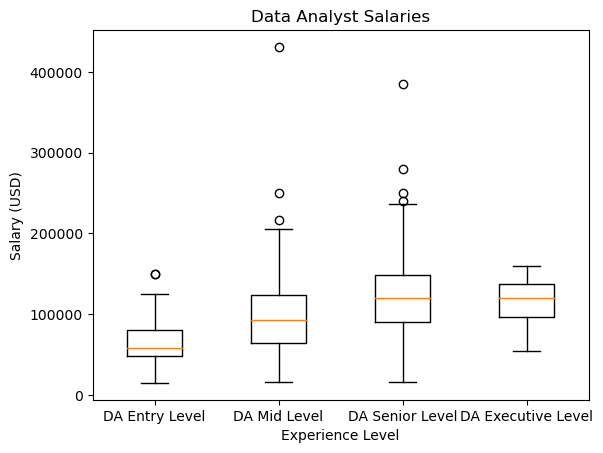

The lower quartile of DA Entry Level salary is: 47899.0
The upper quartile of DA Entry Level salary is: 80000.0
The interquartile range of DA Entry Level salary is: 32101.0
The the median of DA Entry Level salary is: 57920.0 
Values below -252.5 could be outliers.
Values above 128151.5 could be outliers.
-------------------------------------------------------
The lower quartile of DA Mid Level salary is: 64500.0
The upper quartile of DA Mid Level salary is: 124000.0
The interquartile range of DA Mid Level salary is: 59500.0
The the median of DA Mid Level salary is: 93000.0 
Values below -24750.0 could be outliers.
Values above 213250.0 could be outliers.
-------------------------------------------------------
The lower quartile of DA Senior Level salary is: 90320.0
The upper quartile of DA Senior Level salary is: 149200.0
The interquartile range of DA Senior Level salary is: 58880.0
The the median of DA Senior Level salary is: 119610.0 
Values below 2000.0 could be outliers.
Values abo

In [14]:
da_salaries_entry = data_df.loc[(data_df['Job Title'] == "Data Analyst") & (data_df['Experience Level'] == 'Entry'), 'Salary in USD']
da_salaries_mid = data_df.loc[(data_df['Job Title'] == "Data Analyst") & (data_df['Experience Level'] == 'Mid'), 'Salary in USD']
da_salaries_senior = data_df.loc[(data_df['Job Title'] == "Data Analyst") & (data_df['Experience Level'] == 'Senior'), 'Salary in USD']
da_salaries_executive = data_df.loc[(data_df['Job Title'] == "Data Analyst") & (data_df['Experience Level'] == 'Executive'), 'Salary in USD']

plt.boxplot([da_salaries_entry, da_salaries_mid, da_salaries_senior, da_salaries_executive], labels=['DA Entry Level', 'DA Mid Level', 'DA Senior Level', 'DA Executive Level'])

plt.title('Data Analyst Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

quartiles = da_salaries_entry.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DA Entry Level salary is: {lowerq}")
print(f"The upper quartile of DA Entry Level salary is: {upperq}")
print(f"The interquartile range of DA Entry Level salary is: {iqr}")
print(f"The the median of DA Entry Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------
print('-------------------------------------------------------')
quartiles = da_salaries_mid.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DA Mid Level salary is: {lowerq}")
print(f"The upper quartile of DA Mid Level salary is: {upperq}")
print(f"The interquartile range of DA Mid Level salary is: {iqr}")
print(f"The the median of DA Mid Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------

print('-------------------------------------------------------')
quartiles = da_salaries_senior.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DA Senior Level salary is: {lowerq}")
print(f"The upper quartile of DA Senior Level salary is: {upperq}")
print(f"The interquartile range of DA Senior Level salary is: {iqr}")
print(f"The the median of DA Senior Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#---------------------------------------------------------------------

print('-------------------------------------------------------')
quartiles = da_salaries_executive.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DA Executive Level salary is: {lowerq}")
print(f"The upper quartile of DA Executive Level salary is: {upperq}")
print(f"The interquartile range of DA Executive Level salary is: {iqr}")
print(f"The the median of DA Executive Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


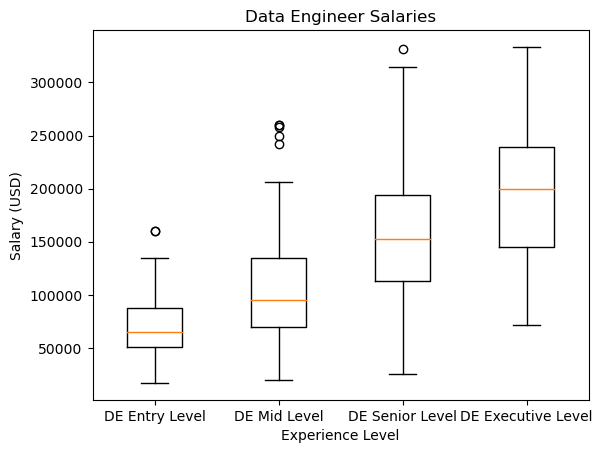

The lower quartile of DE Entry Level salary is: 50876.5
The upper quartile of DE Entry Level salary is: 88000.0
The interquartile range of DE Entry Level salary is: 37123.5
The the median of DE Entry Level salary is: 65000.0 
Values below -4808.75 could be outliers.
Values above 143685.25 could be outliers.
-------------------------------------------------------
The lower quartile of DE Mid Level salary is: 70034.75
The upper quartile of DE Mid Level salary is: 135000.0
The interquartile range of DE Mid Level salary is: 64965.25
The the median of DE Mid Level salary is: 95000.0 
Values below -27413.125 could be outliers.
Values above 232447.875 could be outliers.
-------------------------------------------------------
The lower quartile of DE Senior Level salary is: 112850.0
The upper quartile of DE Senior Level salary is: 194100.0
The interquartile range of DE Senior Level salary is: 81250.0
The the median of DE Senior Level salary is: 152437.5 
Values below -9025.0 could be outliers.

In [19]:
de_salaries_entry = data_df.loc[(data_df['Job Title'] == "Data Engineer") & (data_df['Experience Level'] == 'Entry'), 'Salary in USD']
de_salaries_mid = data_df.loc[(data_df['Job Title'] == "Data Engineer") & (data_df['Experience Level'] == 'Mid'), 'Salary in USD']
de_salaries_senior = data_df.loc[(data_df['Job Title'] == "Data Engineer") & (data_df['Experience Level'] == 'Senior'), 'Salary in USD']
de_salaries_executive = data_df.loc[(data_df['Job Title'] == "Data Engineer") & (data_df['Experience Level'] == 'Executive'), 'Salary in USD']

plt.boxplot([de_salaries_entry, de_salaries_mid, de_salaries_senior, de_salaries_executive], labels=['DE Entry Level', 'DE Mid Level', 'DE Senior Level', 'DE Executive Level'])

plt.title('Data Engineer Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

quartiles = de_salaries_entry.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DE Entry Level salary is: {lowerq}")
print(f"The upper quartile of DE Entry Level salary is: {upperq}")
print(f"The interquartile range of DE Entry Level salary is: {iqr}")
print(f"The the median of DE Entry Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------
print('-------------------------------------------------------')
quartiles = de_salaries_mid.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DE Mid Level salary is: {lowerq}")
print(f"The upper quartile of DE Mid Level salary is: {upperq}")
print(f"The interquartile range of DE Mid Level salary is: {iqr}")
print(f"The the median of DE Mid Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------

print('-------------------------------------------------------')
quartiles = de_salaries_senior.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DE Senior Level salary is: {lowerq}")
print(f"The upper quartile of DE Senior Level salary is: {upperq}")
print(f"The interquartile range of DE Senior Level salary is: {iqr}")
print(f"The the median of DE Senior Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#---------------------------------------------------------------------

print('-------------------------------------------------------')
quartiles = de_salaries_executive.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DE Executive Level salary is: {lowerq}")
print(f"The upper quartile of DE Executive Level salary is: {upperq}")
print(f"The interquartile range of DE Executive Level salary is: {iqr}")
print(f"The the median of DE Executive Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


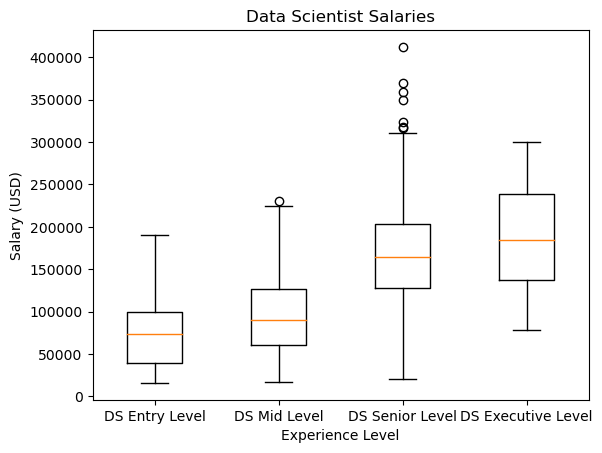

The lower quartile of DS Entry Level salary is: 39981.25
The upper quartile of DS Entry Level salary is: 100000.0
The interquartile range of DS Entry Level salary is: 60018.75
The the median of DS Entry Level salary is: 74141.0 
Values below -50046.875 could be outliers.
Values above 190028.125 could be outliers.
-------------------------------------------------------
The lower quartile of DS Mid Level salary is: 60581.0
The upper quartile of DS Mid Level salary is: 126875.0
The interquartile range of DS Mid Level salary is: 66294.0
The the median of DS Mid Level salary is: 90367.0 
Values below -38860.0 could be outliers.
Values above 226316.0 could be outliers.
-------------------------------------------------------
The lower quartile of DS Senior Level salary is: 128325.0
The upper quartile of DS Senior Level salary is: 202950.0
The interquartile range of DS Senior Level salary is: 74625.0
The the median of DS Senior Level salary is: 164500.0 
Values below 16387.5 could be outliers.

In [25]:
ds_salaries_entry = data_df.loc[(data_df['Job Title'] == "Data Scientist") & (data_df['Experience Level'] == 'Entry'), 'Salary in USD']
ds_salaries_mid = data_df.loc[(data_df['Job Title'] == "Data Scientist") & (data_df['Experience Level'] == 'Mid'), 'Salary in USD']
ds_salaries_senior = data_df.loc[(data_df['Job Title'] == "Data Scientist") & (data_df['Experience Level'] == 'Senior'), 'Salary in USD']
ds_salaries_executive = data_df.loc[(data_df['Job Title'] == "Data Scientist") & (data_df['Experience Level'] == 'Executive'), 'Salary in USD']

plt.boxplot([ds_salaries_entry, ds_salaries_mid, ds_salaries_senior, ds_salaries_executive], labels=['DS Entry Level', 'DS Mid Level', 'DS Senior Level', 'DS Executive Level'])

plt.title('Data Scientist Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

quartiles = ds_salaries_entry.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DS Entry Level salary is: {lowerq}")
print(f"The upper quartile of DS Entry Level salary is: {upperq}")
print(f"The interquartile range of DS Entry Level salary is: {iqr}")
print(f"The the median of DS Entry Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------
print('-------------------------------------------------------')
quartiles = ds_salaries_mid.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DS Mid Level salary is: {lowerq}")
print(f"The upper quartile of DS Mid Level salary is: {upperq}")
print(f"The interquartile range of DS Mid Level salary is: {iqr}")
print(f"The the median of DS Mid Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------

print('-------------------------------------------------------')
quartiles = ds_salaries_senior.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DS Senior Level salary is: {lowerq}")
print(f"The upper quartile of DS Senior Level salary is: {upperq}")
print(f"The interquartile range of DS Senior Level salary is: {iqr}")
print(f"The the median of DS Senior Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#---------------------------------------------------------------------

print('-------------------------------------------------------')
quartiles = ds_salaries_executive.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of DS Executive Level salary is: {lowerq}")
print(f"The upper quartile of DS Executive Level salary is: {upperq}")
print(f"The interquartile range of DS Executive Level salary is: {iqr}")
print(f"The the median of DS Executive Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


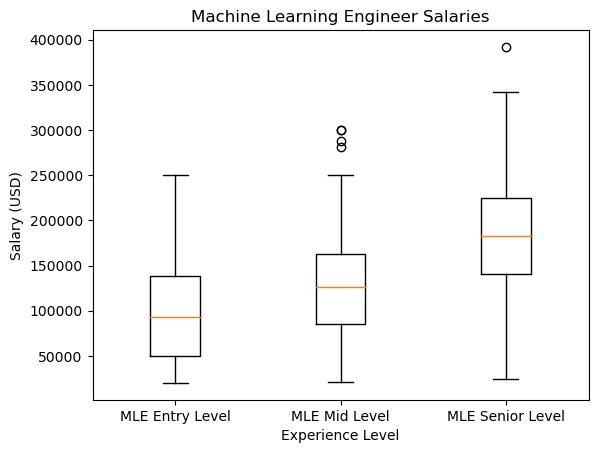

The lower quartile of MLE Entry Level salary is: 50330.75
The upper quartile of MLE Entry Level salary is: 138562.5
The interquartile range of MLE Entry Level salary is: 88231.75
The the median of MLE Entry Level salary is: 92500.0 
Values below -82016.875 could be outliers.
Values above 270910.125 could be outliers.
-------------------------------------------------------
The lower quartile of MLE Mid Level salary is: 85526.5
The upper quartile of MLE Mid Level salary is: 162500.0
The interquartile range of MLE Mid Level salary is: 76973.5
The the median of MLE Mid Level salary is: 126277.0 
Values below -29933.75 could be outliers.
Values above 277960.25 could be outliers.
-------------------------------------------------------
The lower quartile of MLE Senior Level salary is: 140100.0
The upper quartile of MLE Senior Level salary is: 225000.0
The interquartile range of MLE Senior Level salary is: 84900.0
The the median of MLE Senior Level salary is: 182200.0 
Values below 12750.0 cou

In [30]:
mle_salaries_entry = data_df.loc[(data_df['Job Title'] == "Machine Learning Engineer") & (data_df['Experience Level'] == 'Entry'), 'Salary in USD']
mle_salaries_mid = data_df.loc[(data_df['Job Title'] == "Machine Learning Engineer") & (data_df['Experience Level'] == 'Mid'), 'Salary in USD']
mle_salaries_senior = data_df.loc[(data_df['Job Title'] == "Machine Learning Engineer") & (data_df['Experience Level'] == 'Senior'), 'Salary in USD']

plt.boxplot([mle_salaries_entry, mle_salaries_mid, mle_salaries_senior], labels=['MLE Entry Level', 'MLE Mid Level', 'MLE Senior Level'])

plt.title('Machine Learning Engineer Salaries')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

quartiles = mle_salaries_entry.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of MLE Entry Level salary is: {lowerq}")
print(f"The upper quartile of MLE Entry Level salary is: {upperq}")
print(f"The interquartile range of MLE Entry Level salary is: {iqr}")
print(f"The the median of MLE Entry Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------
print('-------------------------------------------------------')
quartiles = mle_salaries_mid.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of MLE Mid Level salary is: {lowerq}")
print(f"The upper quartile of MLE Mid Level salary is: {upperq}")
print(f"The interquartile range of MLE Mid Level salary is: {iqr}")
print(f"The the median of MLE Mid Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

#-----------------------------------------------------------------------

print('-------------------------------------------------------')
quartiles = mle_salaries_senior.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of MLE Senior Level salary is: {lowerq}")
print(f"The upper quartile of MLE Senior Level salary is: {upperq}")
print(f"The interquartile range of MLE Senior Level salary is: {iqr}")
print(f"The the median of MLE Senior Level salary is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

In [ ]:
job_titles = newer_expert_salary_stats_df.index.get_level_values(0).unique()
fig, ax = plt.subplots()
for job_title in job_titles:
    expertise_levels = newer_expert_salary_stats_df.loc[job_title].index
    average_salaries = newer_expert_salary_stats_df.loc[job_title]["Average Salary"]
    ax.plot(expertise_levels, average_salaries, label=job_title)
    
ax.set_xlabel("Expertise Level")
ax.set_ylabel("Average Salary (USD)")
ax.set_title("Average Salary by Expertise Level for Each Job Title")

legend = ax.legend(loc='lower right')
legend.get_frame().set_linewidth(0.5)  
legend.get_frame().set_edgecolor('black')  
plt.setp(legend.get_texts(), fontsize='small')  

plt.grid()

plt.show()